<a href="https://colab.research.google.com/github/robin-ochieng/Machine-Learning/blob/main/Isolation_forest_Anomaly_Detection_by_R_O_O_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
data = pd.read_excel('/content/Fidelity_Claims.xlsx')

In [3]:
data.dtypes

Category                   object
ClaimNo                    object
Policy No                  object
Insured                    object
Peril                      object
Loss Date          datetime64[ns]
Reported           datetime64[ns]
Paid Date          datetime64[ns]
Statutory Class            object
Gross Paid                float64
  MANDATORY                object
Q/S TREATY                 object
1ST.TREATY                 object
2ND.TREATY                 object
FACRE                      object
5                          object
NetPaid                    object
dtype: object

In [4]:
data.head()

,Category,ClaimNo,Policy No,Insured,Peril,Loss Date,Reported,Paid Date,Statutory Class,Gross Paid,MANDATORY,Q/S TREATY,1ST.TREATY,2ND.TREATY,FACRE,5,NetPaid
0,Outstanding,THK/C/503/001997/22,THK/P/503/010167/22,OSORO MOCHAMA JUSTIN,ACCIDENTAL DAMAGE,2022-12-29,2022-12-29,NaT,MOTOR PRIVATE,250000.0,0,0,0,0,0,0,250000
1,Outstanding,THK/C/503/001998/22,THK/P/503/001943/18,KARIUKI FRANCIS MUTEMWA,ACCIDENTAL DAMAGE,2022-12-28,2022-12-28,NaT,MOTOR PRIVATE,250000.0,0,0,0,0,0,0,250000
2,Outstanding,THK/C/503/001994/22,THK/P/503/009606/22,ANTONY KIMATHI KABURU,WINDSCREEN DAMAGE,2022-12-27,2022-12-28,NaT,MOTOR PRIVATE,20000.0,0,0,0,0,0,0,20000
3,Outstanding,CBD/C/401/008799/22,CBD/P/401/152954/22,CHINA RAILWAY TWENTY FIRST BUREAU GROUP (KENYA...,ACCIDENTAL DAMAGE,2022-12-27,2022-12-29,NaT,MOTOR COMMERCIAL,200000.0,0,0,0,0,0,0,200000
4,Outstanding,THK/C/503/001992/22,THK/P/503/010857/22,MARTIN SAMUEL NYAMU MAINA,WINDSCREEN DAMAGE,2022-12-26,2022-12-28,NaT,MOTOR PRIVATE,20000.0,0,0,0,0,0,0,20000


In [5]:
data.columns

Index([       'Category',         'ClaimNo',       'Policy No',
               'Insured',           'Peril',       'Loss Date',
              'Reported',       'Paid Date', 'Statutory Class',
            'Gross Paid',     '  MANDATORY',      'Q/S TREATY',
            '1ST.TREATY',      '2ND.TREATY',           'FACRE',
                       5,         'NetPaid'],
      dtype='object')

In [6]:
# Convert date columns to datetime format and extract desired date components
data['Loss Date'] = pd.to_datetime(data['Loss Date'])
data['Reported'] = pd.to_datetime(data['Reported'])
data['Loss Year'] = data['Loss Date'].dt.year
data['Loss Month'] = data['Loss Date'].dt.month
data['Reported Year'] = data['Reported'].dt.year
data['Reported Month'] = data['Reported'].dt.month
data['Loss Day'] = data['Loss Date'].dt.day
data['Reported Day'] = data['Reported'].dt.day

In [7]:
data.head(4)

,Category,ClaimNo,Policy No,Insured,Peril,Loss Date,Reported,Paid Date,Statutory Class,Gross Paid,...,2ND.TREATY,FACRE,5,NetPaid,Loss Year,Loss Month,Reported Year,Reported Month,Loss Day,Reported Day
0,Outstanding,THK/C/503/001997/22,THK/P/503/010167/22,OSORO MOCHAMA JUSTIN,ACCIDENTAL DAMAGE,2022-12-29,2022-12-29,NaT,MOTOR PRIVATE,250000.0,...,0,0,0,250000,2022,12,2022,12,29,29
1,Outstanding,THK/C/503/001998/22,THK/P/503/001943/18,KARIUKI FRANCIS MUTEMWA,ACCIDENTAL DAMAGE,2022-12-28,2022-12-28,NaT,MOTOR PRIVATE,250000.0,...,0,0,0,250000,2022,12,2022,12,28,28
2,Outstanding,THK/C/503/001994/22,THK/P/503/009606/22,ANTONY KIMATHI KABURU,WINDSCREEN DAMAGE,2022-12-27,2022-12-28,NaT,MOTOR PRIVATE,20000.0,...,0,0,0,20000,2022,12,2022,12,27,28
3,Outstanding,CBD/C/401/008799/22,CBD/P/401/152954/22,CHINA RAILWAY TWENTY FIRST BUREAU GROUP (KENYA...,ACCIDENTAL DAMAGE,2022-12-27,2022-12-29,NaT,MOTOR COMMERCIAL,200000.0,...,0,0,0,200000,2022,12,2022,12,27,29


In [8]:
data.columns

Index([       'Category',         'ClaimNo',       'Policy No',
               'Insured',           'Peril',       'Loss Date',
              'Reported',       'Paid Date', 'Statutory Class',
            'Gross Paid',     '  MANDATORY',      'Q/S TREATY',
            '1ST.TREATY',      '2ND.TREATY',           'FACRE',
                       5,         'NetPaid',       'Loss Year',
            'Loss Month',   'Reported Year',  'Reported Month',
              'Loss Day',    'Reported Day'],
      dtype='object')

In [9]:
# Drop the original date columns
data= data.drop(['Loss Date', 'Reported'], axis=1)

In [10]:
df = data[['Category', 'Peril', 'Statutory Class',	'Gross Paid', 'Loss Year', 'Reported Year', 'Loss Month', 'Reported Month', 'Loss Day', 'Reported Day']]

In [11]:
df.head(4)

,Category,Peril,Statutory Class,Gross Paid,Loss Year,Reported Year,Loss Month,Reported Month,Loss Day,Reported Day
0,Outstanding,ACCIDENTAL DAMAGE,MOTOR PRIVATE,250000.0,2022,2022,12,12,29,29
1,Outstanding,ACCIDENTAL DAMAGE,MOTOR PRIVATE,250000.0,2022,2022,12,12,28,28
2,Outstanding,WINDSCREEN DAMAGE,MOTOR PRIVATE,20000.0,2022,2022,12,12,27,28
3,Outstanding,ACCIDENTAL DAMAGE,MOTOR COMMERCIAL,200000.0,2022,2022,12,12,27,29


In [12]:
df.dtypes

Category            object
Peril               object
Statutory Class     object
Gross Paid         float64
Loss Year            int64
Reported Year        int64
Loss Month           int64
Reported Month       int64
Loss Day             int64
Reported Day         int64
dtype: object

In [13]:
df.head(1)

,Category,Peril,Statutory Class,Gross Paid,Loss Year,Reported Year,Loss Month,Reported Month,Loss Day,Reported Day
0,Outstanding,ACCIDENTAL DAMAGE,MOTOR PRIVATE,250000.0,2022,2022,12,12,29,29


In [14]:
df_clean = df.dropna(subset=['Peril'])

In [15]:
df_clean.isnull().sum()

Category           0
Peril              0
Statutory Class    0
Gross Paid         0
Loss Year          0
Reported Year      0
Loss Month         0
Reported Month     0
Loss Day           0
Reported Day       0
dtype: int64

In [16]:
df_clean.dtypes

Category            object
Peril               object
Statutory Class     object
Gross Paid         float64
Loss Year            int64
Reported Year        int64
Loss Month           int64
Reported Month       int64
Loss Day             int64
Reported Day         int64
dtype: object

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83882 entries, 0 to 85094
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         83882 non-null  object 
 1   Peril            83882 non-null  object 
 2   Statutory Class  83882 non-null  object 
 3   Gross Paid       83882 non-null  float64
 4   Loss Year        83882 non-null  int64  
 5   Reported Year    83882 non-null  int64  
 6   Loss Month       83882 non-null  int64  
 7   Reported Month   83882 non-null  int64  
 8   Loss Day         83882 non-null  int64  
 9   Reported Day     83882 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 7.0+ MB


In [18]:
# Remove duplicates, missing values, and outliers
df_clean = df_clean.drop_duplicates().dropna()
df_clean = df_clean[(df_clean['Gross Paid'] >= 0)]

In [19]:
# Convert categorical variables to numerical values using one-hot encoding
cat_vars = ['Category', 'Peril', 'Statutory Class']
df_clean = pd.get_dummies(df_clean, columns=cat_vars, drop_first=True)

In [20]:
df_clean.head()

,Gross Paid,Loss Year,Reported Year,Loss Month,Reported Month,Loss Day,Reported Day,Category_Paid,Category_Recovery,"Peril_, ACCIDENTAL DAMAGE, GENERAL DAMAGE",...,Statutory Class_FIRE INDUSTRIAL,Statutory Class_LIABILITY,Statutory Class_MARINE,Statutory Class_MISCELLANEOUS,Statutory Class_MOTOR COMMERCIAL,Statutory Class_MOTOR COMMERCIAL-PSV,Statutory Class_MOTOR PRIVATE,Statutory Class_PERSONAL ACCIDENT,Statutory Class_THEFT,Statutory Class_WORKMENS COMPENSATION
0,250000.0,2022,2022,12,12,29,29,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,250000.0,2022,2022,12,12,28,28,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,20000.0,2022,2022,12,12,27,28,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,200000.0,2022,2022,12,12,27,29,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20000.0,2022,2022,12,12,26,28,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df_clean.shape

(73146, 136)

In [22]:
# Split the dataset into training and testing sets
X_train, X_test = train_test_split(df_clean, test_size=0.2, random_state=42)

In [23]:
# Scale the numerical features
scaler = StandardScaler()
num_vars = ['Gross Paid']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [24]:
from sklearn.ensemble import IsolationForest
# Train the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
clf.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [ ]:
# Predict the anomaly scores on the testing set
scores = clf.score_samples(X_test)
threshold = np.percentile(scores, 5)
fraud_indices = np.where(scores < threshold)[0]
print(fraud_indices)


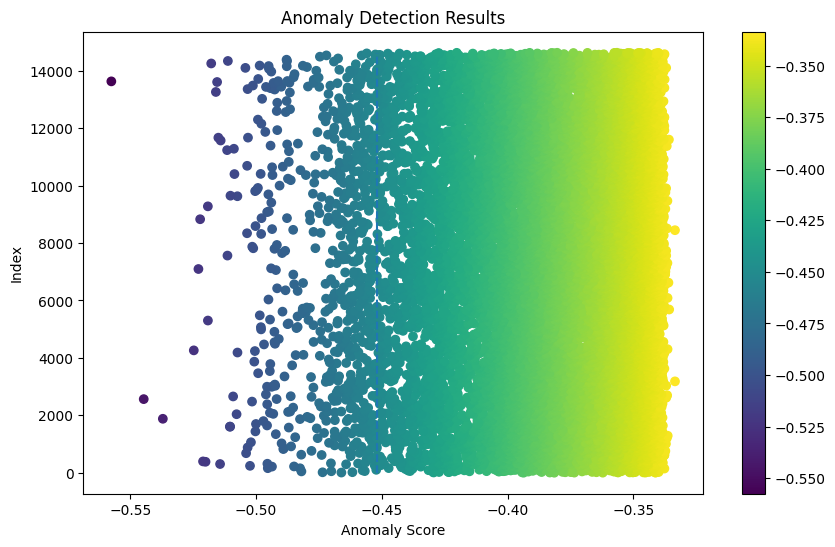

In [26]:
# Plot the anomaly scores from the model
plt.figure(figsize=(10, 6))
plt.scatter(scores, np.arange(len(scores)), c=scores, cmap='viridis')
plt.plot([threshold, threshold], [0, len(scores)], linestyle='--')
plt.xlabel('Anomaly Score')
plt.ylabel('Index')
plt.title('Anomaly Detection Results')
plt.colorbar()
plt.show()

##Distribution of anomalies in the testing set

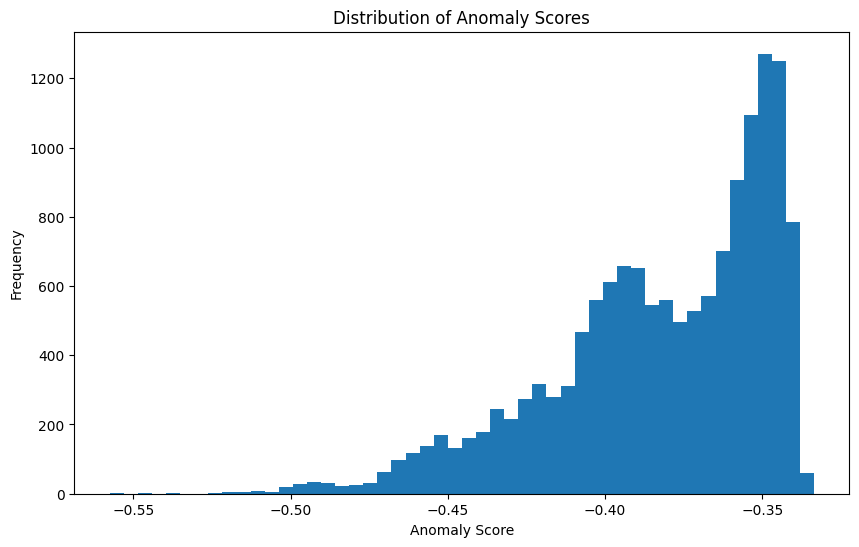

In [27]:
# Visualize the distribution of anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

###**A right-skewed distribution as indicated above means that the majority of the data points have lower values, and the higher values are less frequent. This indicates that there are more normal data points than anomalous data points.**

##Applying the Same Algorithm on the Whole Dataset to Identify Anomalies

In [31]:
clf.fit(df_clean)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

##Predict the anomaly scores on the whole dataset and Set a threshold for identifying potential anomalies based on the anomaly scores. 

In [32]:
scores = clf.score_samples(df_clean)
threshold = np.percentile(scores, 5)


##Identify the potential anomalies in the whole dataset based on the threshold.

In [33]:
potential_anomalies = np.where(scores < threshold)[0]


In [36]:
print(f"Number of potential fraudulent claims: {len(potential_anomalies)}")

Number of potential fraudulent claims: 3658


## Plotting the potential fraud indices on the whole dataset

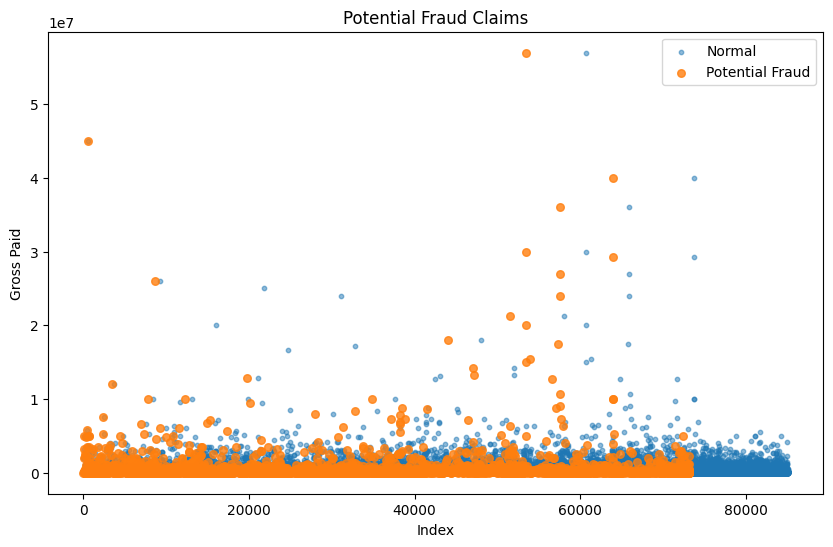

In [35]:
# Plot the potential fraud indices on the whole dataset
plt.figure(figsize=(10, 6))
plt.scatter(df_clean.index, df_clean['Gross Paid'], s=10, alpha=0.5, label='Normal')
plt.scatter(potential_anomalies, df_clean.iloc[potential_anomalies]['Gross Paid'], s=30, alpha=0.8, label='Potential Fraud')
plt.xlabel('Index')
plt.ylabel('Gross Paid')
plt.title('Potential Fraud Claims')
plt.legend()
plt.show()

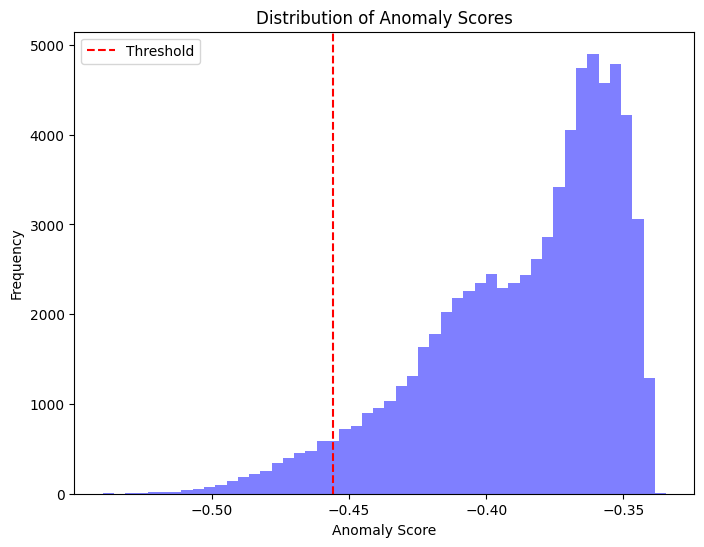

In [37]:
# Plot a histogram of the anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50, color='blue', alpha=0.5)
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()


##The data points with anomaly scores below the threshold are the ones that should be considered potential fraudulent claims.

##**Note** 
The Isolation Forest algorithm used in this model works by creating a forest of decision trees. Each tree is grown using a random subset of the features in the dataset and random values for splitting each feature. The algorithm then isolates instances by repeatedly partitioning the feature space using randomly selected features and split values until the instances are isolated.

The main idea behind this algorithm is that normal data points are easier to separate from each other using a smaller number of splits compared to anomalies, which are typically isolated quickly by a larger number of splits. Thus, the anomalies will have a shorter average path length from the root of the tree to the isolated node compared to normal points.

The anomaly scores are calculated based on the average path length of an instance in the forest. The lower the score, the more likely the instance is to be an anomaly. In this case, any instance with an anomaly score below a certain threshold is considered a potential fraud claim.

So, in summary, the Isolation Forest algorithm identifies potential fraudulent claims by isolating them in a decision tree forest using a smaller number of splits than normal claims, resulting in a shorter average path length from the root to the isolated node, and then assigns an anomaly score based on the average path length, with lower scores indicating a higher likelihood of being a fraud.